<a href="https://colab.research.google.com/github/Nikhila-KS/Unravel_ML/blob/main/7_trial_1_Heart_beat_audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Heartbeat Audio Classification</u></b> 💟

The ownership of the original work lies with Nittala Venkata Sai Aditya, Gandhi Disha, Saibhargav, Tetali, Vishwak Venkatesh, and Soumith Reddy Palreddy.

Referenced Medium blog :     [LINK](https://medium.com/@vishwakvv29/heartbeat-audio-classification-using-machine-learning-305e568efecc)

While embarking on my internship project centered around heart rate classification, I eagerly delved into the abundant resources in Google.

Fortunately, I chanced upon their exceptional Medium blog, which presented a remarkable project aligned seamlessly with my own objectives.

##🔸Import Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
!pip install pydub
# import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy.signal import spectrogram
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
!pip install tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
!pip install keras
import keras
from tensorflow.keras import regularizers
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


## 🔸Read Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# Upload data
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
done


In [5]:
# INPUT_PATH = "Data/"
# SAMPLE_RATE = 22050
set_a_normal_audios = pd.read_csv('Data/Set A/Atraining_normal_seg.csv')
set_b_normal_audios = pd.read_csv('Data/Set B/Btraining_normal_seg.csv')
set_a_normal_audios.head(5)
# set_a_normal_audios = pd.read_csv('Atraining_normal_seg.csv')
# set_b_normal_audios = pd.read_csv('Btraining_normal_seg.csv')
# set_a_normal_audios.head(5)

,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔸Loading and visualizing a sample wave

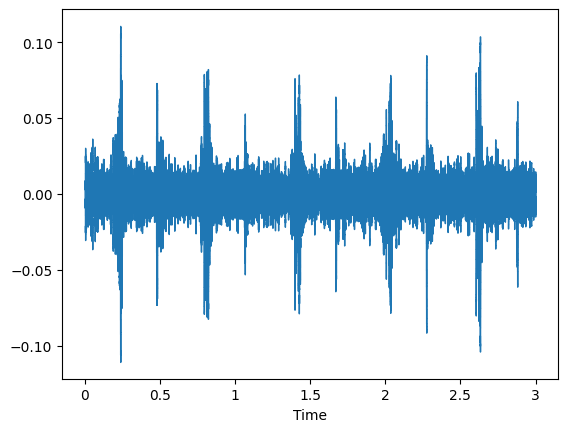

In [6]:
sampledata, sampling_rate = librosa.load('Data/Set A/audio_files/normal__201102081321.wav', duration=3)
librosa.display.waveshow(sampledata, sr=sampling_rate)

## 🔸 Loading all the metadata for set A and B

In [7]:
set_a_metadata = pd.read_csv('Data/Set A/set_a.csv').drop('sublabel', axis = 1).dropna()
set_b_metadata = pd.read_csv('Data/Set B/set_b.csv').drop('sublabel', axis = 1).dropna()
print("SET A ")
set_a_metadata

SET A 


,dataset,fname,label
0,a,set_a/artifact__201012172012.wav,artifact
1,a,set_a/artifact__201105040918.wav,artifact
2,a,set_a/artifact__201105041959.wav,artifact
3,a,set_a/artifact__201105051017.wav,artifact
4,a,set_a/artifact__201105060108.wav,artifact
...,...,...,...
119,a,set_a/normal__201106221450.wav,normal
120,a,set_a/normal__201108011112.wav,normal
121,a,set_a/normal__201108011114.wav,normal
122,a,set_a/normal__201108011115.wav,normal


## 🔸 Checking class label for set A and set B

In [8]:
print("SET A")
set_a_metadata['label'].value_counts()


SET A


artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [9]:
print("SET B")
set_b_metadata['label'].value_counts()

SET B


normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

## 🔸Merging both the sets together

In [10]:
total_train_metadata = pd.concat([set_a_metadata, set_b_metadata], ignore_index=True) # concatenation

## 🔸some important functions to generate features


In [11]:
INPUT_PATH = "Data/"
SAMPLE_RATE = 22050
def load_audio_timeseries(fileName, setName, offset=0, duration=None):
    if setName == 'a' :
        y, sr = librosa.load("Data/Set A/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    elif setName == 'b' :
        y, sr = librosa.load("Data/Set B/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    else:
        sys.exit('Please enter a valid Set')
    return(y)

The code you provided is a Python function that loads an audio timeseries from a file. The function takes three arguments:

fileName: The name of the audio file to load.
setName: The set that the audio file belongs to (A or B).
offset: The offset into the audio file to start loading from.
duration: The duration of the audio file to load.
The function first checks the value of setName. If setName is equal to 'a', the function loads the audio file from the Set A/audio_files directory. If setName is equal to 'b', the function loads the audio file from the Set B/audio_files directory. If setName is not equal to 'a' or 'b', the function exits the program with an error message.

Once the audio file has been loaded, the function returns the audio timeseries as a NumPy array. The audio timeseries is a two-dimensional array, where the first dimension represents the time steps and the second dimension represents the audio channels.

## 🔸 generating required features

In [12]:
total_train_metadata['fname'] = total_train_metadata['fname'].apply(lambda f:f.split('/')[1])

# Remove the prefix "Btraining_" from the fname column.
total_train_metadata['fname'] =  [re.sub(r'Btraining_','', str(x)) for x in total_train_metadata['fname']]

# Load the audio timeseries for each audio file.
total_train_metadata['time_series']=total_train_metadata.apply(lambda row:load_audio_timeseries(row['fname'],row['dataset']),axis=1)

# Calculate the duration of each audio file in seconds.
total_train_metadata['audio_duration'] = round(total_train_metadata['time_series'].apply(len) / SAMPLE_RATE, 1)


## 🔸plotting the pie chart to represent the class distribution across the training data

<Axes: ylabel='fname'>

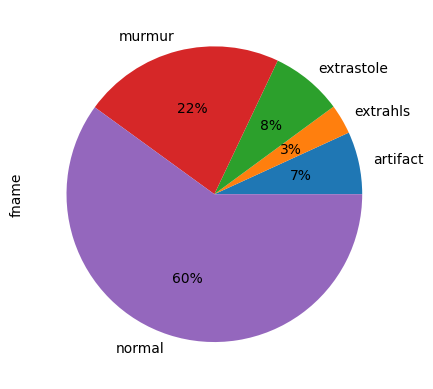

In [13]:
total_train_metadata.groupby('label')["fname"].count().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

# The code you provided is a Python code that plots a pie chart of the number of audio files in each label.
# The code takes a Pandas DataFrame called total_train_metadata as input. The DataFrame contains the following columns:
# label: The label of the audio file (cat or dog).
# fname: The name of the audio file.
# The code first groups the DataFrame by the label column. This means that the code creates a new DataFrame with one row
# for each label.The new DataFrame contains the following columns:
# label: The label of the audio file.
# count: The number of audio files in the label.
# The code then plots a pie chart of the count column. The pie chart shows the percentage of audio files in each label.
#  The autopct parameter is used to display the percentage value as a percentage in the pie chart. The textprops parameter is
#  used to set the font size of the percentage values in the pie chart.


## 🔸 Plotting the different types of wave in order to find out the distinguishing features

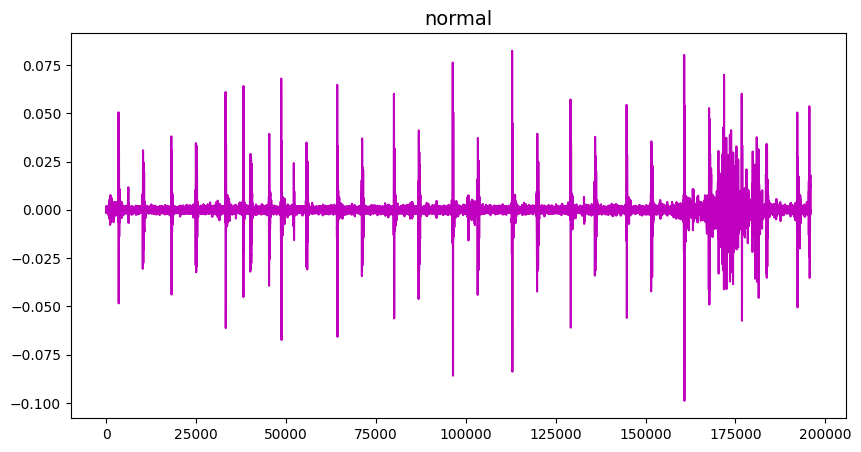

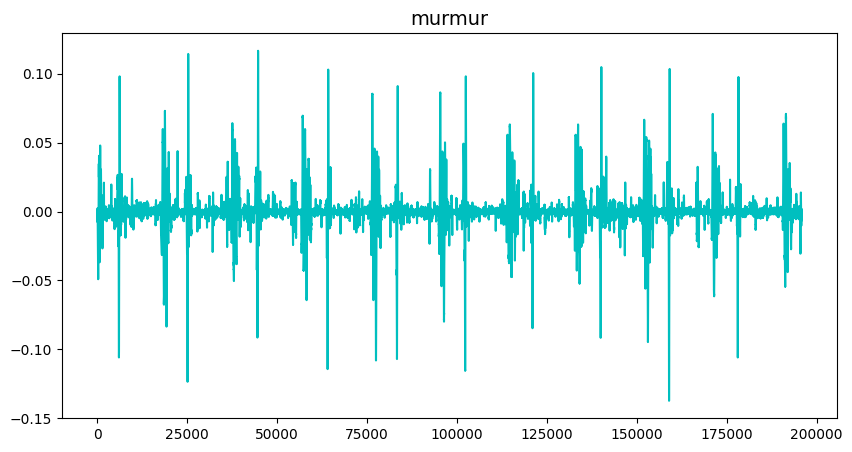

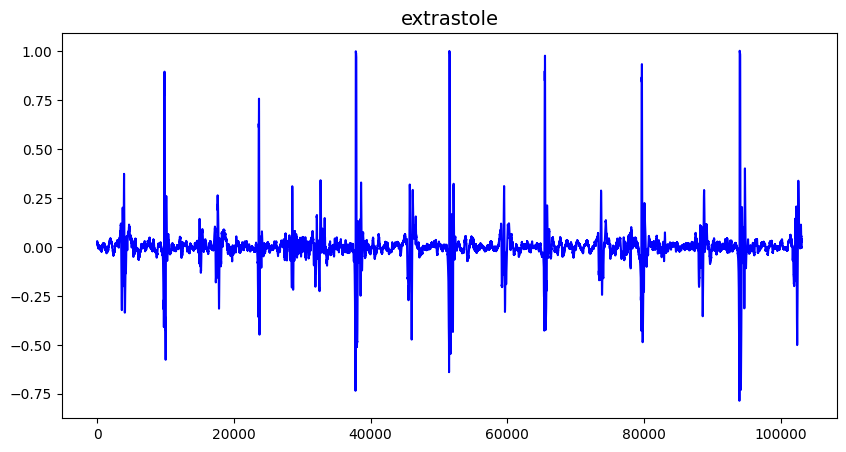

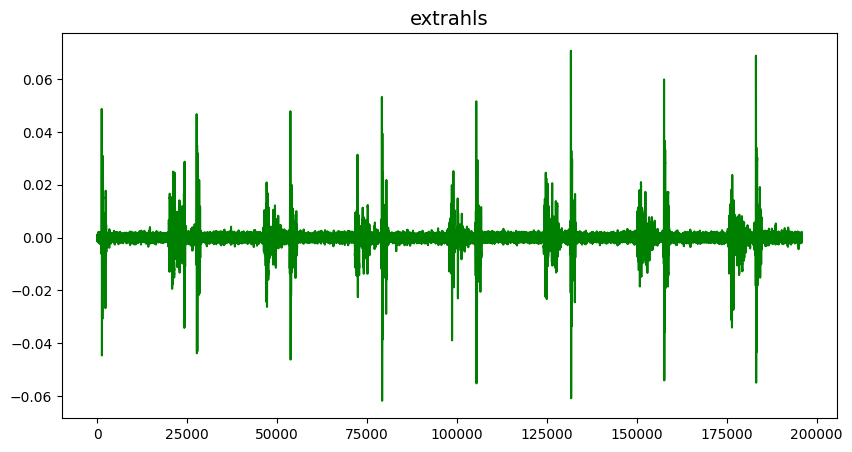

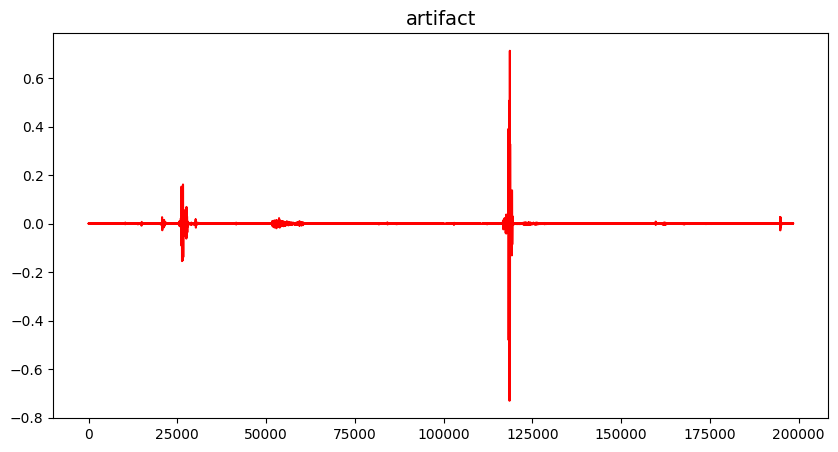

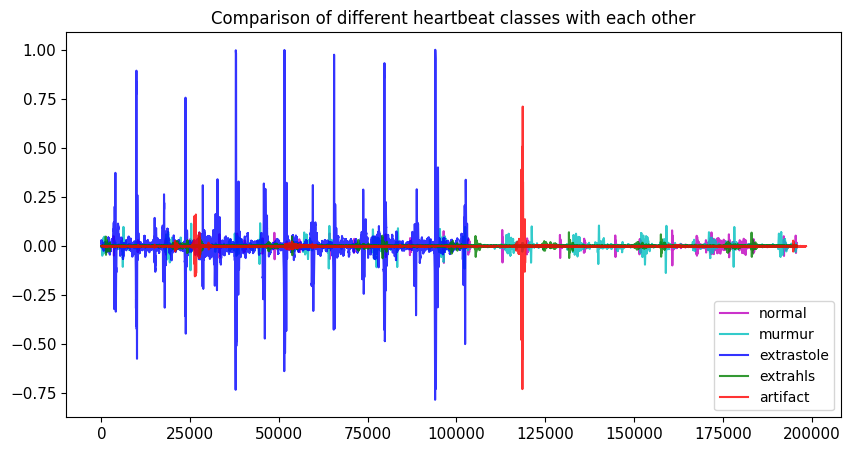

In [14]:
normal = total_train_metadata.loc[total_train_metadata['label'] == 'normal'].head(1)
murmur = total_train_metadata.loc[total_train_metadata['label'] == 'murmur'].head(1)
extrastole = total_train_metadata.loc[total_train_metadata['label'] == 'extrastole'].head(1)
extrahls = total_train_metadata.loc[total_train_metadata['label'] == 'extrahls'].head(1)
artifact = total_train_metadata.loc[total_train_metadata['label'] == 'artifact'].head(1)

plt.figure(1, figsize=(10,5))
plt.title('normal', fontsize=14)
plt.plot(normal['time_series'].values[0], c='m')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(2, figsize=(10, 5))
plt.title('murmur',  fontsize=14)
plt.plot(murmur['time_series'].values[0], c='c')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(3, figsize=(10, 5))
plt.title('extrastole',  fontsize=14)
plt.plot(extrastole['time_series'].values[0], c='b')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(4, figsize=(10, 5))
plt.title('extrahls',  fontsize=14)
plt.plot(extrahls['time_series'].values[0], c='g')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(5, figsize=(10, 5))
plt.title('artifact',  fontsize=14)
plt.plot(artifact['time_series'].values[0], c='r')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(6, figsize=(10, 5))
plt.plot(normal['time_series'].values[0], c='m', label='normal', alpha=0.8)
plt.plot(murmur['time_series'].values[0], c='c', label='murmur', alpha=0.8)
plt.plot(extrastole['time_series'].values[0], c='b', label='extrastole', alpha=0.8)
plt.plot(extrahls['time_series'].values[0], c='g', label='extrahls', alpha=0.8)
plt.plot(artifact['time_series'].values[0], c='r', label='artifact', alpha=0.8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.title('Comparison of different heartbeat classes with each other',  fontsize=12)
plt.legend(loc='lower right',  fontsize=10)

## 🔸 Plotting the data to find the data source distribution


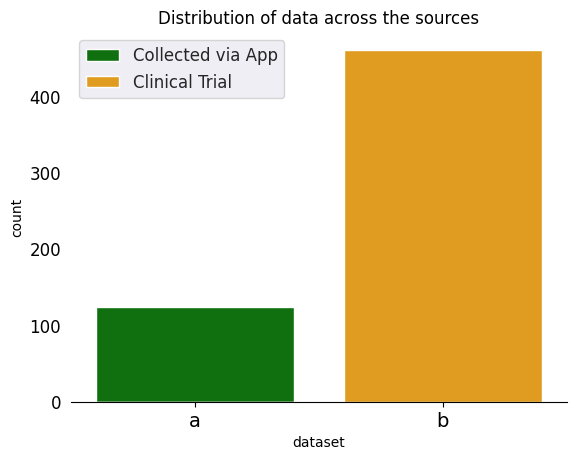

In [15]:
fig,ax = plt.subplots()
sns.set(font_scale=1.3)
color = ['green','orange','limegreen','darkgreen','royalblue','black','red','blue','navy']
sns.countplot(x='dataset',hue='dataset',data=total_train_metadata,dodge=False, palette=color)
plt.title('Distribution of data across the sources', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(left=False)
sns.despine(left=True)

plt.legend(loc='upper left', labels=['Collected via App','Clinical Trial'], fontsize=12)
plt.show()

## 🔸 summary statistics for audio duration across each class of heartbeat

In [16]:
total_train_metadata.groupby(total_train_metadata['label']).describe()['audio_duration']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
artifact,40.0,9.000000,0.000000,9.0,9.00,9.00,9.000,9.0
extrahls,19.0,6.868421,2.822145,0.9,6.10,8.00,9.000,9.0
extrastole,46.0,5.856522,3.123648,1.9,3.60,5.15,7.675,13.4
murmur,129.0,7.765116,4.092670,0.9,4.60,7.90,9.200,24.2
normal,351.0,6.316524,4.346994,0.8,2.85,5.10,9.000,27.9


## 🔸oscillogram plots for all types of classes


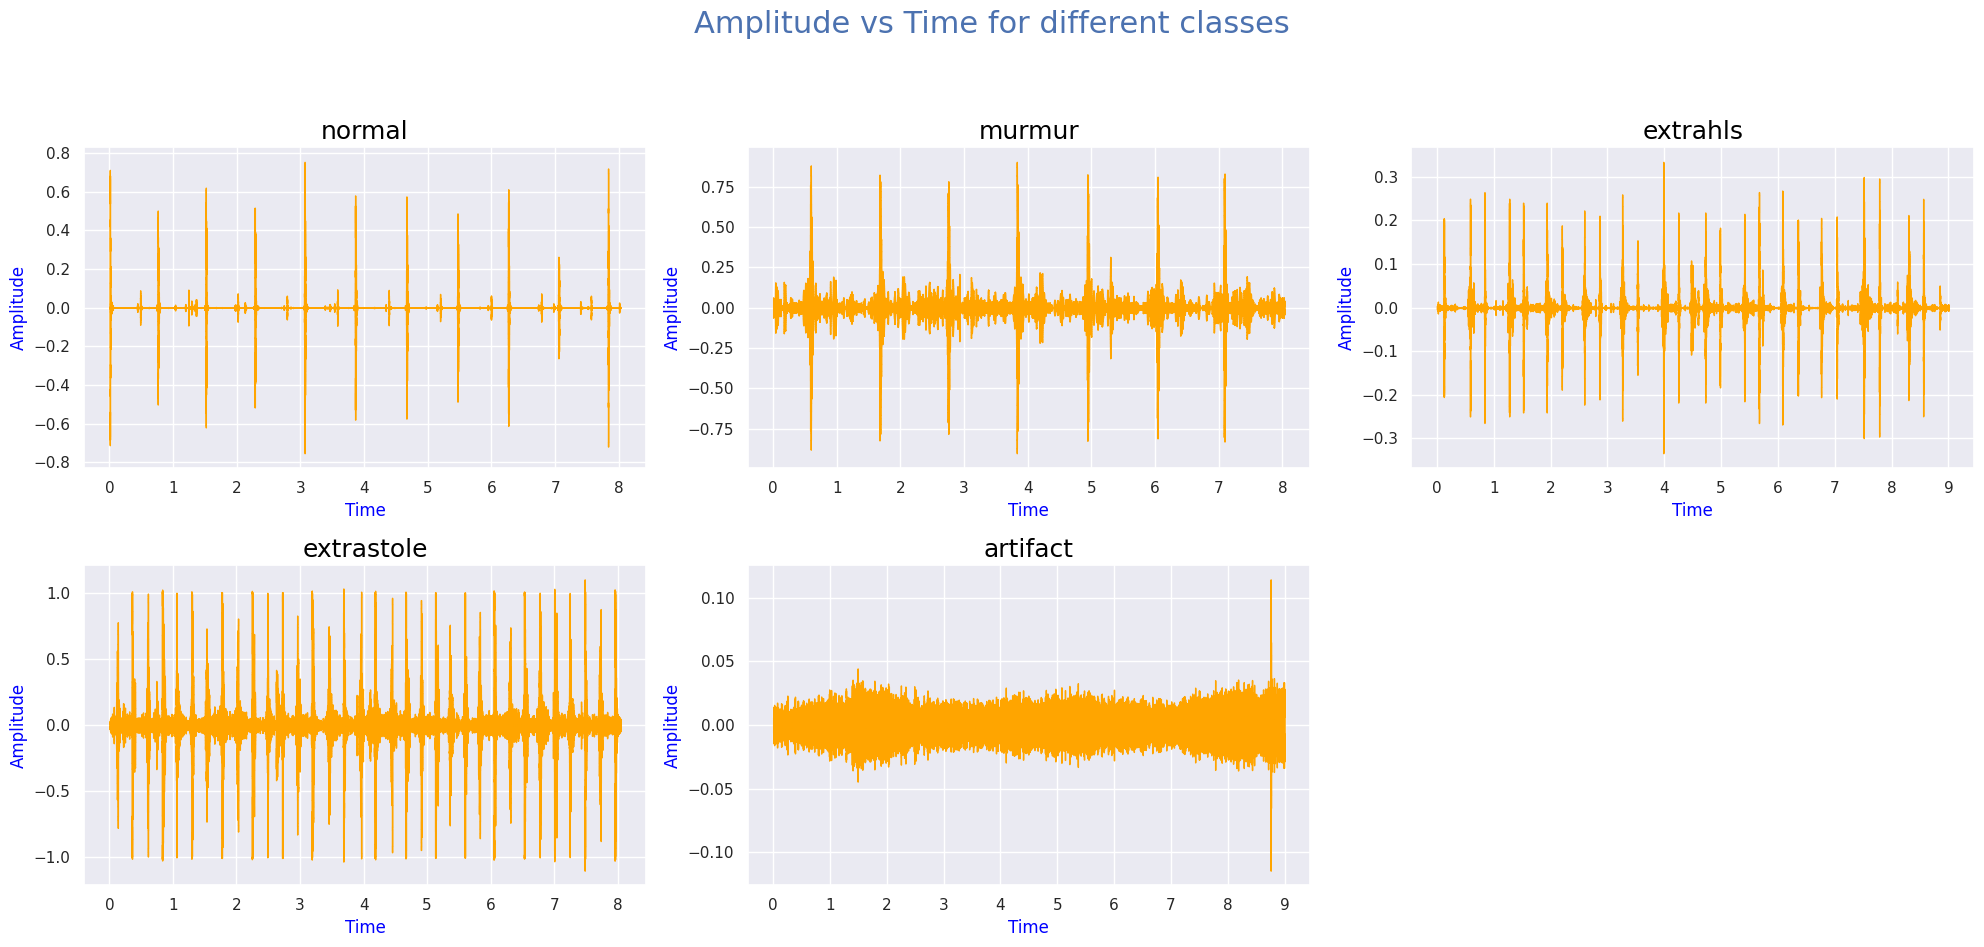

In [17]:
samples = ['normal__201103170121.wav', 'murmur__201101180902.wav', 'extrahls__201101241423.wav',
            'extrastole_235_1308749032454_B.wav', 'artifact__201106171003.wav']

sns.set(font_scale=1)

with plt.rc_context():
    plt.figure(figsize=(20,9), facecolor='None')
    plt.subplots_adjust(bottom=0.1e-5)
    plt.suptitle("Amplitude vs Time for different classes",x=0.5,y=1.05,fontsize=22, color='b')
    for i, f in enumerate(samples, 1):
        if i < 6:
            y, sr = librosa.load("Data/oscillogram_plots/" + f)
            plt.subplot(2, 3, i)
            librosa.display.waveshow(y, sr=SAMPLE_RATE, color='orange')
            plt.title(f.split("_")[0], fontsize=18, color='black')
            plt.xlabel('Time', fontsize=12, color='blue')
            plt.ylabel('Amplitude', fontsize=12, color='blue')
    plt.tight_layout()

## spectograms for all types of classes - couldn't see any significant spectograms

Text(0.5, 0, 'time')

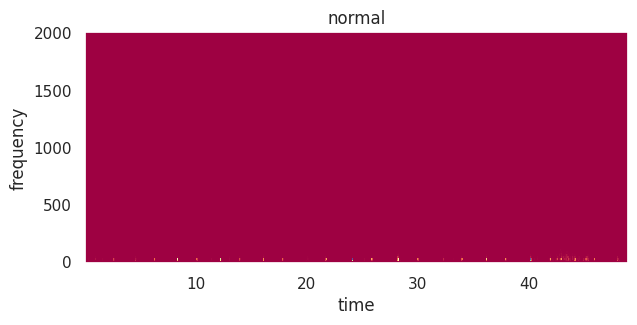

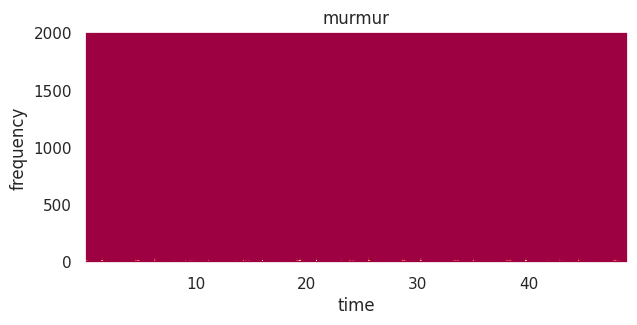

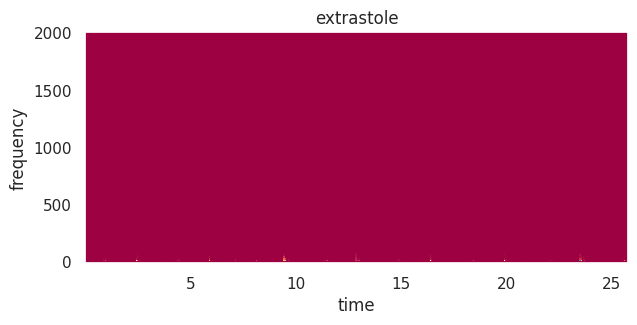

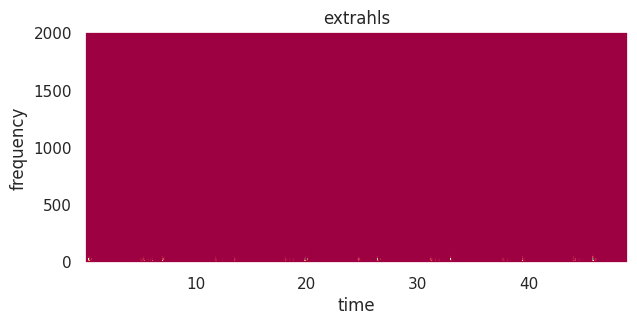

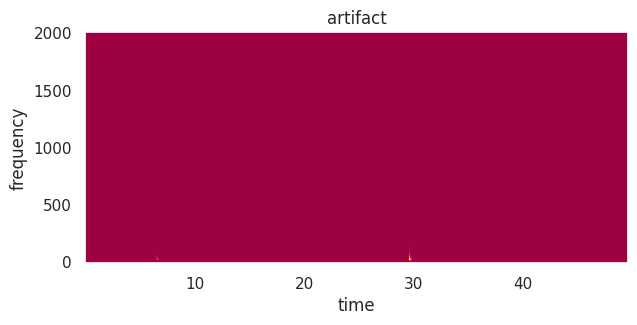

In [18]:
plt.figure(1, figsize=(7,3))
f_normal, t_normal, s_normal = spectrogram(normal['time_series'].values[0], 4000)
plt.title('normal')
plt.pcolormesh(t_normal, f_normal, s_normal, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(2, figsize=(7, 3))
f_murmur, t_murmur, s_murmur = spectrogram(murmur['time_series'].values[0], 4000)
plt.title('murmur')
plt.pcolormesh(t_murmur, f_murmur, s_murmur, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(3, figsize=(7, 3))
f_extrastole, t_extrastole, s_extrastole = spectrogram(extrastole['time_series'].values[0], 4000)
plt.title('extrastole')
plt.pcolormesh(t_extrastole, f_extrastole, s_extrastole, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(4, figsize=(7, 3))
f_extrahls, t_extrahls, s_extrahls = spectrogram(extrahls['time_series'].values[0], 4000)
plt.title('extrahls')
plt.pcolormesh(t_extrahls, f_extrahls, s_extrahls, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(5, figsize=(7, 3))
f_artifact, t_artifact, s_artifact = spectrogram(artifact['time_series'].values[0], 4000)
plt.title('artifact')
plt.pcolormesh(t_artifact, f_artifact, s_artifact, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

## 🔸talking about the class imbalance we can clearly see it through the below pie

<Axes: ylabel='audio_duration'>

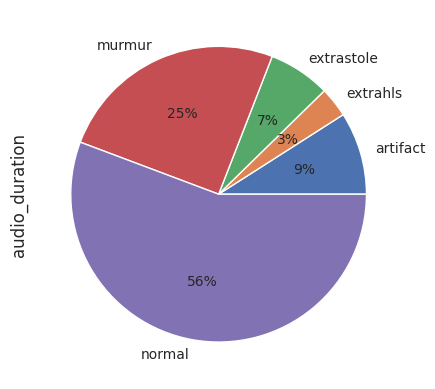

In [19]:
total_train_metadata.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})


# 💠Feature Engineering

In [20]:
# some important functions for feature engineering

def loading_audio_files_increasing_data(filename, set_name):

    if set_name == 'a' :
        data,sr = librosa.load("Data/Set A/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)
    elif set_name == 'b' :
        data,sr = librosa.load("Data/Set B/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)

    output1 = getting_audio_function(data)
    result = np.array(output1)

    noise_output = noise_generation_function(data)
    output2 = getting_audio_function(noise_output)
    result = np.vstack((result,output2))

    stretch_output = stretch_generation_function(data,0.6)
    stretch_pitch = pitch_generation_function(stretch_output,SAMPLE_RATE)
    output3 = getting_audio_function(stretch_pitch)
    result = np.vstack((result,output3))


    return result

In [21]:
def getting_audio_function(data):

    output_result = np.array([])

    mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero_crossing_rate))

    stft_output = np.abs(librosa.stft(data))
    chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,chroma_mean))

    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))

    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))

    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mel_output))

    return output_result

In [22]:
def noise_generation_function(data):
    noise_value = 0.009 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data

def stretch_generation_function(data,rate=0.6):
    return librosa.effects.time_stretch(data,rate=0.6)

def shift_generation_function(data):
    shift_range = int(np.random.uniform(-3,3) * 1000)
    return np.roll(data,shift_range)

def pitch_generation_function(data,SAMPLE_RATE,pitch_factor=0.3):
    return librosa.effects.pitch_shift(data,sr= SAMPLE_RATE,n_steps=pitch_factor)

In [23]:
def y_bin(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] != 4:
            y[i] = 1
    return y

In [24]:
def bin_cf_matrix(bin_prob,bin_y):
    y_pred = np.zeros(bin_prob.shape[0])
    for i in range(bin_prob.shape[0]):
        if bin_prob[i,0] > bin_prob[i,1]:
            y_pred[i] = 0
        else:
            y_pred[i] = 1

    return confusion_matrix(bin_y,y_pred)

In [25]:
def bin_prob(x):
    y = np.zeros((x.shape[0],2))
    for i in range(x.shape[0]):
        y[i,1] = np.sum(x[i,:-1])
        y[i,0] = x[i,-1]
    return y

In [26]:
def bin_accuracy_score(x):
    return (x[0,0]+x[1,1])/np.sum(x)

def bin_f1_score(cf):
    precision = cf[1,1]/(cf[1,1]+cf[0,1])
    recall = cf[1,1]/(cf[1,1]+cf[1,0])
    f1_score = (2*precision*recall)/(precision+recall)
    return precision,recall,f1_score

def y_bin_cnn(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i,-1] != 1:
            y[i] = 1
    return y

In [27]:
x = []
y = []

for index, row in total_train_metadata.iterrows():
        wav_features = loading_audio_files_increasing_data(row['fname'],row['dataset'])
        for indexing in wav_features:
            x.append(indexing)
            y.append(row['label'])

In [28]:
print(len(y))
print(len(x))

1755
1755


## 🔸Understanding new features in data generated above

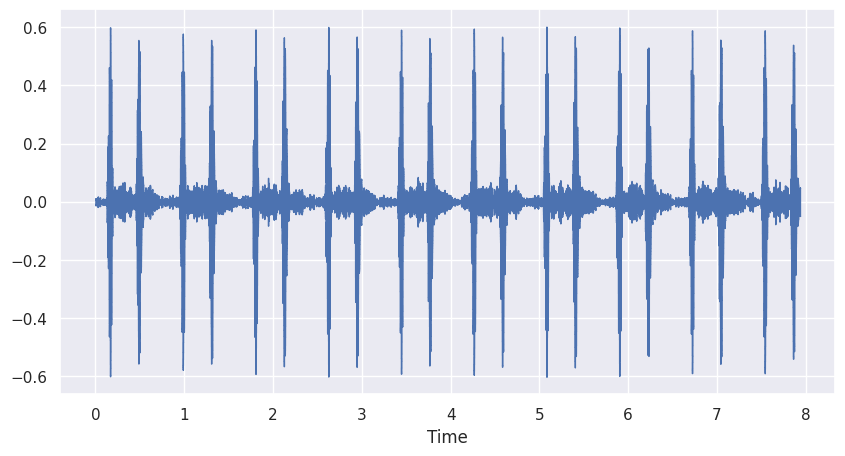

In [29]:
# plain simple audio

figure = plt.figure(figsize=(10,5))
librosa.display.waveshow(total_train_metadata["time_series"][80])

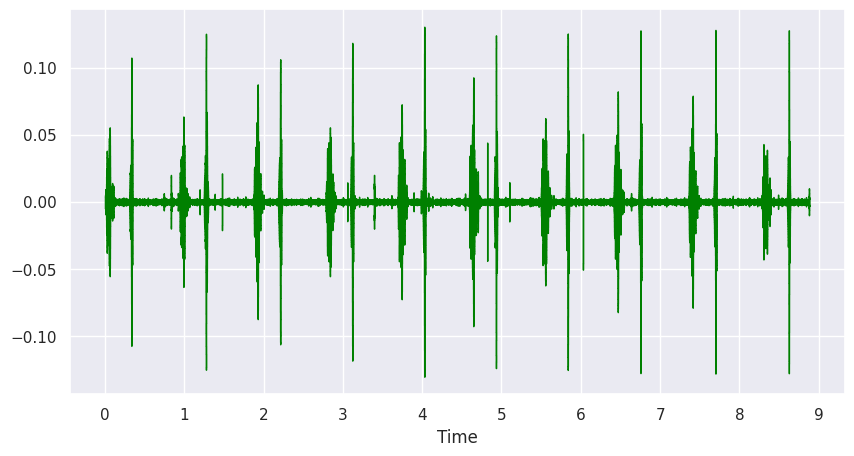

In [30]:
# audio with added noise

figure = plt.figure(figsize=(10,5))
# data,sample_rate = librosa.load(data,duration=3.0)
data=total_train_metadata["time_series"][60]
noise_value = 0.02 * np.random.uniform() * np.amax(data)
data = data + noise_value * np.random.normal(size=data.shape[0])
librosa.display.waveshow(data,sr=SAMPLE_RATE, color='green')

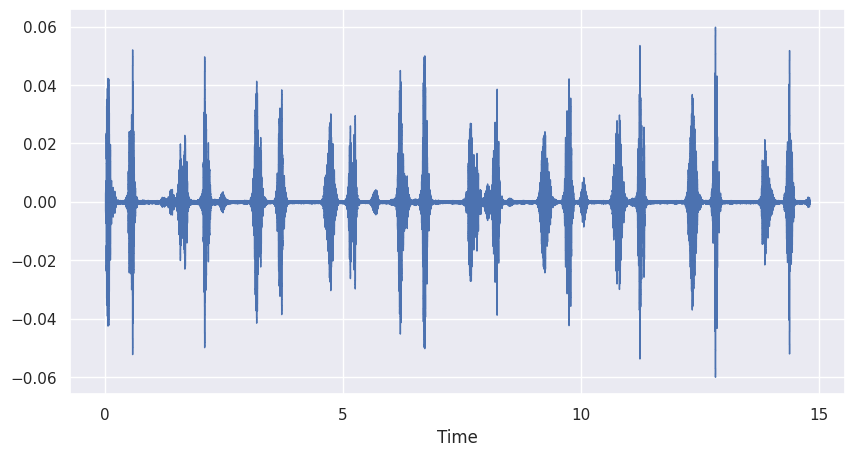

In [31]:
# audio with added noise and stretch, we can see the audio becomes distorted

figure = plt.figure(figsize=(10,5))
# data,sample_rate = librosa.load(total_train_metadata["time_series"][77],duration=3.0)
data=total_train_metadata["time_series"][60]
data = pitch_generation_function(stretch_generation_function(data), SAMPLE_RATE)
librosa.display.waveshow(data,sr=SAMPLE_RATE)

### <u> Encoding + Transforming for CNN

**Using One hot encoding for CNN**

In [32]:
train_df = pd.DataFrame(x)
train_df["category"] = y

train_df.to_csv("train_df.csv",index=False)
train_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,category
0,0.301029,0.850736,0.836792,0.833259,0.834729,0.831498,0.833262,0.829891,0.819718,0.818701,...,6.339757e-06,6.157199e-06,5.180164e-06,4.195213e-06,3.722824e-06,2.819821e-06,2.368681e-06,1.121509e-06,1.024807e-07,artifact
1,0.406757,0.882802,0.892024,0.908533,0.912895,0.914098,0.848725,0.805714,0.806453,0.804409,...,3.815080e-05,3.579002e-05,3.627959e-05,3.452921e-05,3.376449e-05,3.234231e-05,3.355855e-05,3.253440e-05,3.285862e-05,artifact
2,0.200062,0.819896,0.785629,0.786149,0.794678,0.759954,0.747108,0.813400,0.816036,0.783515,...,1.464175e-06,1.385579e-06,1.174237e-06,1.104357e-06,9.444987e-07,8.194442e-07,5.931280e-07,3.119416e-07,1.378349e-08,artifact
3,0.739126,0.861922,0.922210,0.962124,0.974906,0.759760,0.461550,0.478312,0.538435,0.606839,...,8.471805e-09,8.751478e-09,9.196658e-09,8.524148e-09,8.752641e-09,8.733966e-09,7.854172e-09,4.251705e-09,3.304616e-10,artifact
4,0.739419,0.888342,0.945296,0.976051,0.953967,0.622224,0.452792,0.496121,0.564586,0.628409,...,8.472259e-09,8.750786e-09,9.197718e-09,8.525788e-09,8.755026e-09,8.734787e-09,7.853691e-09,4.250592e-09,3.308485e-10,artifact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.090520,0.858961,0.860909,0.861956,0.868337,0.904811,0.888733,0.808047,0.793358,0.795354,...,3.617480e-03,3.667203e-03,3.705609e-03,3.655549e-03,3.741709e-03,3.765629e-03,3.920278e-03,3.673456e-03,3.586291e-03,normal
1751,0.024202,0.741898,0.694919,0.731266,0.767010,0.775904,0.818769,0.789316,0.758636,0.733023,...,9.380850e-08,7.565115e-08,7.981822e-08,9.350476e-08,5.334526e-08,6.332046e-08,6.213346e-08,2.351137e-08,1.891540e-09,normal
1752,0.019332,0.829895,0.812873,0.811829,0.788721,0.777398,0.796602,0.794476,0.829561,0.833659,...,1.615253e-07,1.576406e-07,1.543805e-07,1.514352e-07,1.488635e-07,1.467984e-07,1.451028e-07,1.439343e-07,1.431396e-07,normal
1753,0.038443,0.860031,0.845680,0.838612,0.818988,0.806006,0.797791,0.790856,0.823054,0.836789,...,2.573969e-04,2.615041e-04,2.581094e-04,2.599877e-04,2.565010e-04,2.542530e-04,2.653298e-04,2.615328e-04,2.684979e-04,normal


In [33]:
Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

In [34]:
X = train_df.iloc[:,:-1].values
y = train_df["category"].values

In [35]:
print(X.shape)
print(y.shape)


(1755, 162)
(1755,)


In [36]:
y_cnn = Encoder_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
y_cnn

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [37]:
cnnreference_df = pd.DataFrame()
cnnreference_df['Actual'] = train_df["category"].values
cnnreference_df['Encoded'] = [''.join(str(y_cnn[i,:].tolist())) for i in range(y_cnn.shape[0])]
cnnreference_df.drop_duplicates()

y_cnn.shape

(1755, 5)

In [38]:
# splitting the data

x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(X,y_cnn,train_size=0.8,random_state=42,shuffle=True)

In [39]:
print("x_train_cnn.shape - ", x_train_cnn.shape)
print("y_train_cnn.shape - ",y_train_cnn.shape)
print("x_test_cnn.shape  - ",x_test_cnn.shape)
print("y_test_cnn.shape  - ",y_test_cnn.shape)


x_train_cnn.shape -  (1404, 162)
y_train_cnn.shape -  (1404, 5)
x_test_cnn.shape  -  (351, 162)
y_test_cnn.shape  -  (351, 5)


In [40]:
x_train_cnn = np.expand_dims(x_train_cnn,axis=2)
x_test_cnn = np.expand_dims(x_test_cnn,axis=2)

print(x_train_cnn.shape)
print(x_test_cnn.shape)

(1404, 162, 1)
(351, 162, 1)


In [41]:
# setting the right parameters for implementing CNN

output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_cnn.shape[1],1)

input_shape_dim

(162, 1)

In [42]:
input_shape_dim = (162,1)

output_dim = 5

# 💠<u>Models

## 🔸CNN Conv1D

In [43]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [44]:
# setting the layers for our CNN model

Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(input_shape_dim)))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [45]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout (Dropout)           (None, 81, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0

In [46]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [47]:
Conv1D_Model = Model.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
44/44 [==============================] - 18s 349ms/step - loss: 1.5481 - accuracy: 0.5442 - val_loss: 1.4685 - val_accuracy: 0.5157
Epoch 2/70
44/44 [==============================] - 12s 267ms/step - loss: 1.1612 - accuracy: 0.6111 - val_loss: 1.3555 - val_accuracy: 0.5897
Epoch 3/70
44/44 [==============================] - 11s 262ms/step - loss: 1.1318 - accuracy: 0.6033 - val_loss: 1.2670 - val_accuracy: 0.6040
Epoch 4/70
44/44 [==============================] - 10s 232ms/step - loss: 1.0614 - accuracy: 0.6147 - val_loss: 1.1203 - val_accuracy: 0.5897
Epoch 5/70
44/44 [==============================] - 11s 253ms/step - loss: 0.9709 - accuracy: 0.6282 - val_loss: 1.1187 - val_accuracy: 0.6268
Epoch 6/70
44/44 [==============================] - 12s 279ms/step - loss: 0.9259 - accuracy: 0.6446 - val_loss: 1.0040 - val_accuracy: 0.6382
Epoch 7/70
44/44 [==============================] - 12s 277ms/step - loss: 0.8944 - accuracy: 0.6617 - val_loss: 1.0217 - val_accuracy: 0.6268

In [48]:
Model_Results = Model.evaluate(x_test_cnn,y_test_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

11/11 [==============================] - 0s 42ms/step - loss: 0.9101 - accuracy: 0.6866
LOSS:  0.9101
ACCURACY:  0.6866


In [49]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

y_pred_proba_test_CNN = bin_prob(Model.predict(x_test_cnn))[::,1]
fpr_test_CNN, tpr_test_CNN, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN)
roc_auc_test_CNN = auc(fpr_test_CNN, tpr_test_CNN)
precision_test_CNN, recall_test_CNN, thresholds_test_CNN = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN)

11/11 [==============================] - 1s 44ms/step


In [50]:
indexes_predict = tf.argmax(Model.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 1s 45ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 18,   0,   0,   0,   3],
       [  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  37],
       [  0,   0,   0,  22,  59],
       [  1,   0,   0,   1, 201]], dtype=int32)>

In [51]:
label_names = ['artifact','extrahls','extrastole','murmur','normal']

11/11 [==============================] - 0s 42ms/step


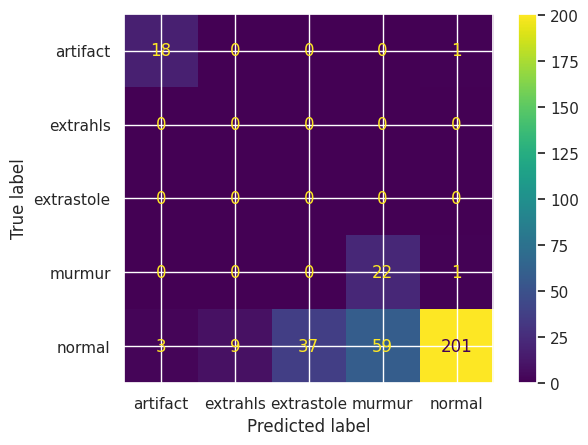

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_cnn=confusion_matrix(Model.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels = label_names)
disp.plot()
plt.show()

In [53]:
label_names_bin = ['normal','abnormal']

11/11 [==============================] - 0s 44ms/step


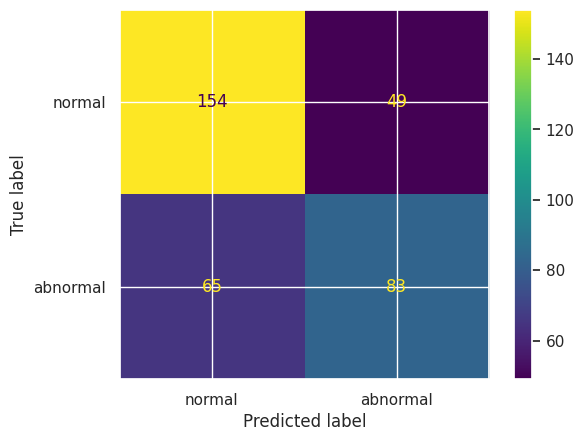

In [54]:
cm_cnn_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [55]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 42ms/step


0.6752136752136753

In [56]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 41ms/step


(0.6287878787878788, 0.5608108108108109, 0.5928571428571429)

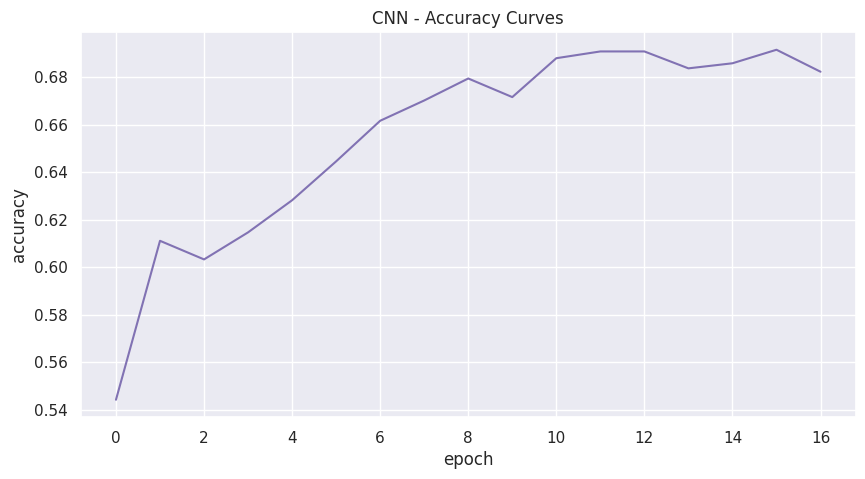

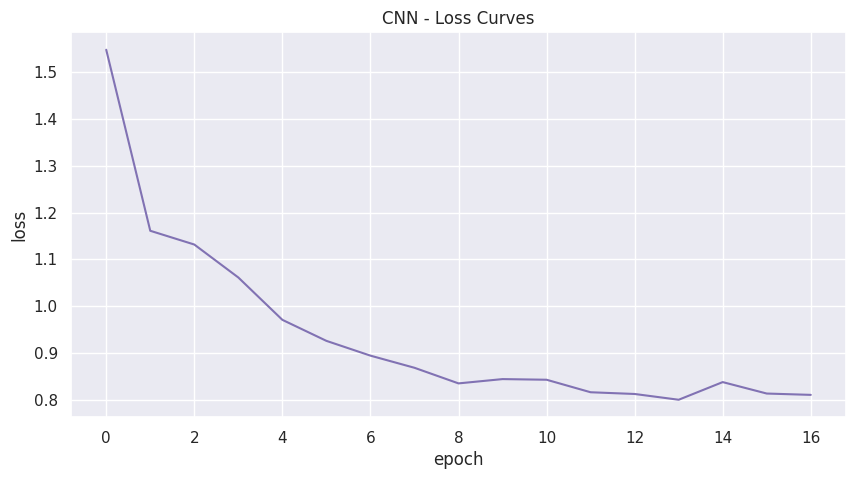

In [57]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔸CNN1D Experiment

In [58]:
Model_2 = Sequential()

#Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation="tanh",input_shape=input_shape_dim))
Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation = 'tanh',input_shape=input_shape_dim))
Model_2.add(BatchNormalization())
Model_2.add(MaxPooling1D(3,strides=2,padding="same"))

Model_2.add(Dense(64, activation='tanh'))

Model_2.add(Flatten())
Model_2.add(Dense(1024, activation='relu'))
Model_2.add(Dropout(0.3))

Model_2.add(Dense(units=output_dim, activation='softmax'))

In [59]:
print(Model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 batch_normalization_1 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 dense_2 (Dense)             (None, 81, 64)            16448     
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [60]:
Model_2.compile(loss='mse', optimizer='adam')
Conv1D_Model_2 = Model_2.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
44/44 [==============================] - ETA: 0s - loss: 0.1559

44/44 [==============================] - 10s 178ms/step - loss: 0.1559 - val_loss: 0.1606
Epoch 2/70
44/44 [==============================] - ETA: 0s - loss: 0.1541

44/44 [==============================] - 6s 131ms/step - loss: 0.1541 - val_loss: 0.1630
Epoch 3/70
44/44 [==============================] - ETA: 0s - loss: 0.1541

44/44 [==============================] - 8s 177ms/step - loss: 0.1541 - val_loss: 0.1630
Epoch 4/70
44/44 [==============================] - ETA: 0s - loss: 0.1541

44/44 [==============================] - 6s 137ms/step - loss: 0.1541 - val_loss: 0.1638
Epoch 5/70
44/44 [==============================] - ETA: 0s - loss: 0.1541

44/44 [==============================] - 8s 182ms/step - loss: 0.1541 - val_loss: 0.1641


In [61]:
Model_Results_2 = Model_2.evaluate(x_test_cnn,y_test_cnn)
print(Model_Results_2)                                                  # chcek again giving wrong results
print("LOSS:  " + "%.4f" % Model_Results_2)
print("ACCURACY:  " + "%.4f" % Model_Results_2)

# Model_Results_2 = Model_2.evaluate(x_test_cnn,y_test_cnn)
# print("LOSS:  " + "%.4f" % Model_Results_2[0])
# print("ACCURACY:  " + "%.4f" % Model_Results_2[1])

11/11 [==============================] - 0s 23ms/step - loss: 0.1641
0.16410207748413086
LOSS:  0.1641
ACCURACY:  0.1641


In [62]:
indexes_predict = tf.argmax(Model_2.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[  4,   0,   0,   0,  17],
       [  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  37],
       [  0,   0,   0,   0,  81],
       [  0,   0,   0,   0, 203]], dtype=int32)>

In [63]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))

11/11 [==============================] - 0s 23ms/step


array([[203,   0],
       [144,   4]])

11/11 [==============================] - 0s 26ms/step


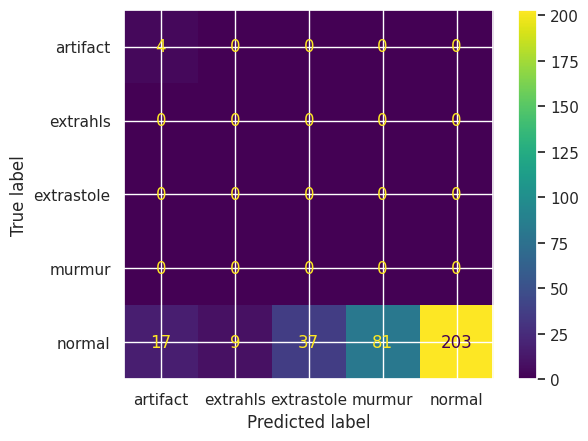

In [64]:
cm_cnn2=confusion_matrix(Model_2.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 24ms/step


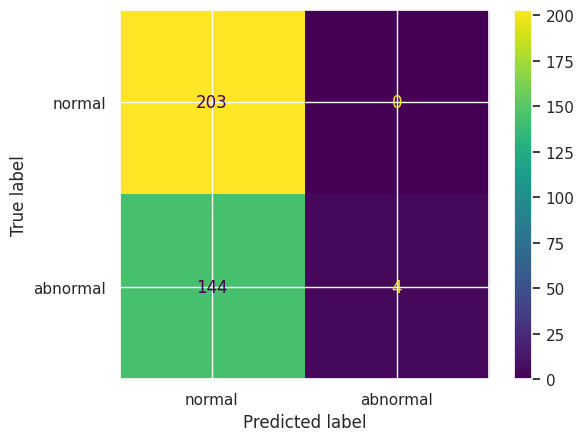

In [65]:
cm_cnn2_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [66]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 37ms/step


0.5897435897435898

In [67]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 39ms/step


(1.0, 0.02702702702702703, 0.052631578947368425)

In [68]:
y_pred_proba_test_CNN2 = bin_prob(Model_2.predict(x_test_cnn))[::,1]
fpr_test_CNN2, tpr_test_CNN2, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN2)
roc_auc_test_CNN2 = auc(fpr_test_CNN2, tpr_test_CNN2)
precision_test_CNN2, recall_test_CNN2, thresholds_test_CNN2 = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN2)

11/11 [==============================] - 0s 37ms/step


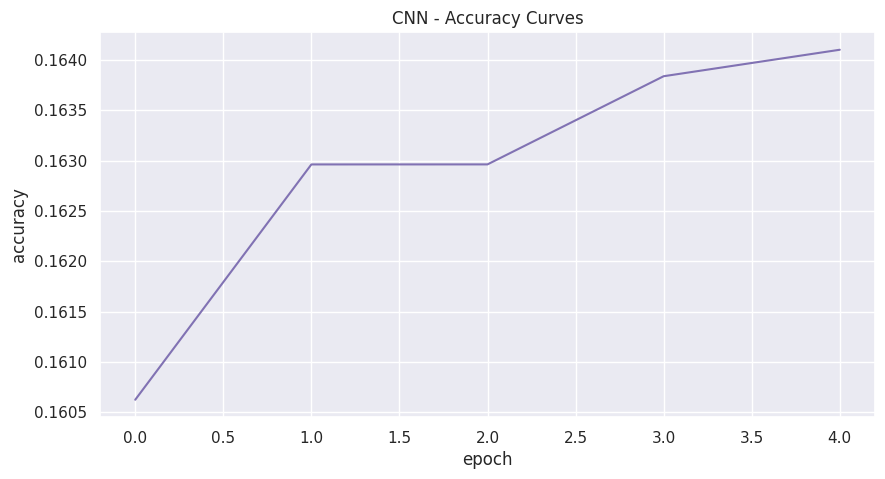

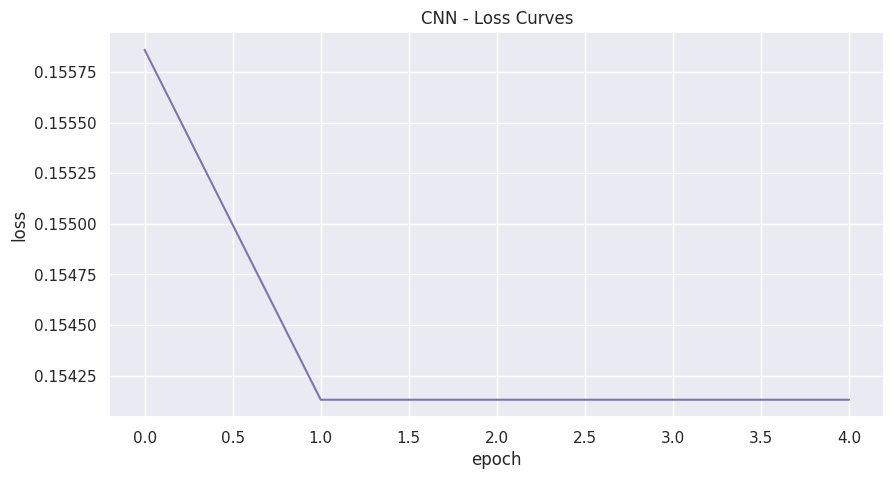

In [78]:
from keras.callbacks import History


# accuracy = Model_2.history['accuracy']
# loss = Model_2.history['loss']                # // wrong results


loss = Conv1D_Model_2.history['loss']
accuracy = Conv1D_Model_2.history['val_loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔹 Rest of the models

In [93]:
y = train_df["category"].values
Label_Encode = LabelEncoder()
y = Label_Encode.fit_transform(y)

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [95]:
reference_df = pd.DataFrame()
reference_df['Actual'] = train_df["category"].values
reference_df['Encoded'] = y
reference_df.drop_duplicates()

,Actual,Encoded
0,artifact,0
120,extrahls,1
177,murmur,3
279,normal,4
372,extrastole,2


In [96]:
x_train = Scaler_Function.fit_transform(x_train)
x_test = Scaler_Function.fit_transform(x_test)

In [97]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


## 🔸RandomForest Classifier

In [84]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


In [85]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV = clf_rfGCV.fit(x_train, y_train)
print(clf_rfGCV.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300, 'random_state': 17}


In [86]:
print('Accuracy Score: ',accuracy_score(y_test,clf_rfGCV.predict(x_test)))

Accuracy Score:  0.6923076923076923


In [87]:
print(confusion_matrix(y_test,clf_rfGCV.predict(x_test)))
print(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  1   0   0   0   8]
 [  0   0   0   3  34]
 [  1   1   0  43  36]
 [  4   0   0  20 179]]
[[ 81 122]
 [ 21 127]]


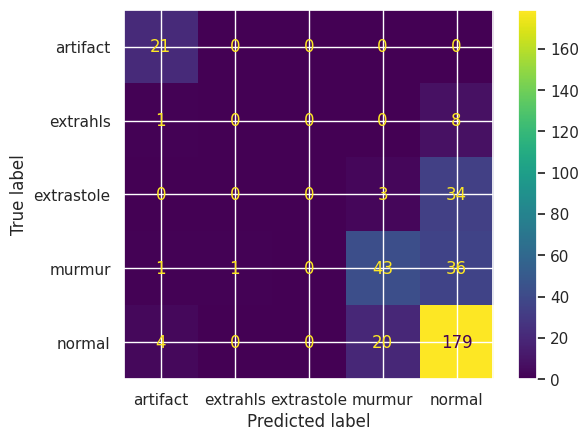

In [88]:
cm_rf=confusion_matrix(y_test,clf_rfGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = label_names)
disp.plot()
plt.show()

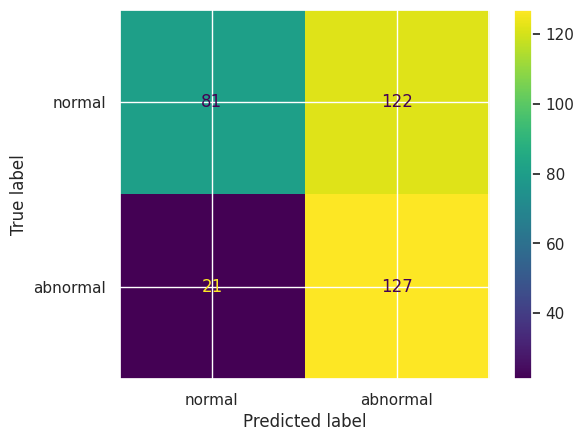

In [89]:
cm_rf_bin=bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [90]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

0.5925925925925926


In [91]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

(0.5100401606425703, 0.8581081081081081, 0.6397984886649875)


In [92]:
y_pred_proba_test_rf = bin_prob(clf_rfGCV.predict_proba(x_test))[::,1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)
precision_test_rf, recall_test_rf, thresholds_test_rf = precision_recall_curve(y_bin(y_test),y_pred_proba_test_rf)

## 🔸 LGBMBoosting Classifier

In [98]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV = clf_XGBGCV.fit(x_train, y_train)
print(clf_XGBGCV.best_params_)

filterwarnings("ignore")

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 17}


In [99]:
print('Accuracy Score: ',accuracy_score(y_test,clf_XGBGCV.predict(x_test)))

Accuracy Score:  0.6752136752136753


In [100]:
y_pred_proba_test_XGB = bin_prob(clf_XGBGCV.predict_proba(x_test))[::,1]
fpr_test_XGB, tpr_test_XGB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_XGB)
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)
precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_XGB)

In [101]:
print(confusion_matrix(y_test,clf_XGBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  2   0   0   2   5]
 [  0   0   7   4  26]
 [  3   0   1  58  19]
 [  6   0   3  43 151]]
[[150  53]
 [ 49  99]]


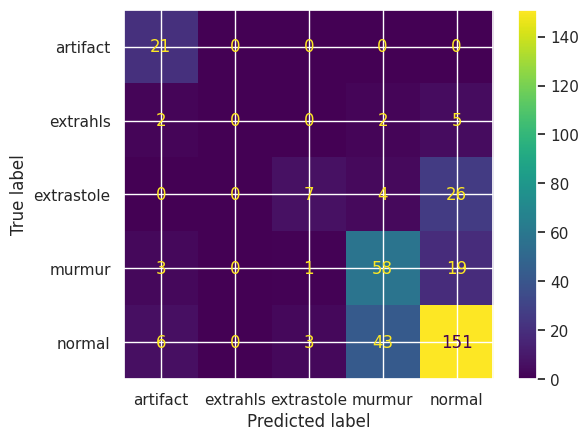

In [102]:
cm_XGB=confusion_matrix(y_test,clf_XGBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels = label_names)
disp.plot()
plt.show()

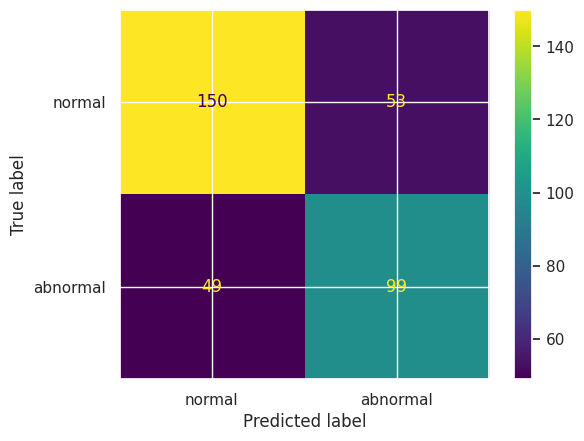

In [103]:
cm_XGB_bin=bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [104]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

0.7094017094017094


In [105]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.6513157894736842, 0.668918918918919, 0.6599999999999999)


## 🔸CatBoost

In [107]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV.fit(x_train, y_train)
print(clf_CBGCV.best_params_)

filterwarnings("ignore")

{'depth': 6, 'l2_leaf_reg': 0.05, 'learning_rate': 0.1, 'random_state': 17}


In [109]:
print('Accuracy Score: ',accuracy_score(y_test,clf_CBGCV.predict(x_test)))
#print('AUC Score: ',roc_auc_score(y_test,clf_CBGCV.best_estimator_.predict_proba(X_test)[:,1]))
#print('F1 Score: ',f1_score(y_test,clf_CBGCV.predict(x_test), average = None))

Accuracy Score:  0.6695156695156695


In [110]:
print(confusion_matrix(y_test,clf_CBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  0   0   0   2   7]
 [  0   0   1  11  25]
 [  0   0   2  56  23]
 [  3   0   0  43 157]]
[[155  48]
 [ 52  96]]


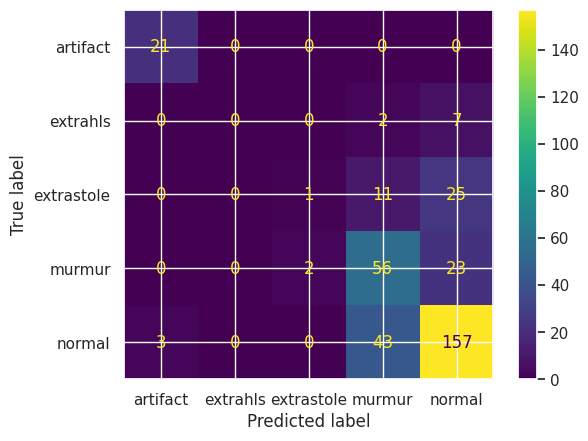

In [111]:
cm_CB=confusion_matrix(y_test,clf_CBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB, display_labels = label_names)
disp.plot()
plt.show()

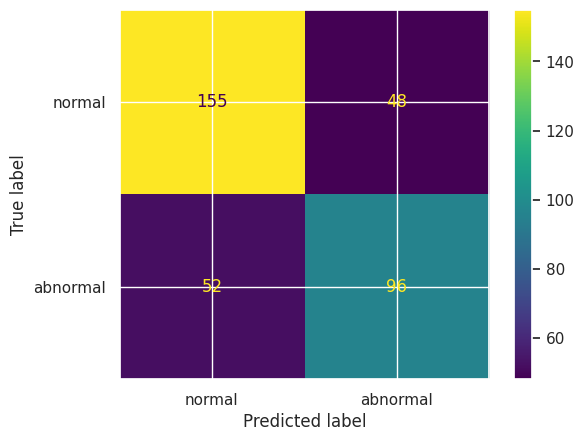

In [112]:
cm_CB_bin=bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [113]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

0.7150997150997151


In [114]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.6666666666666666, 0.6486486486486487, 0.6575342465753425)


In [115]:
y_pred_proba_test_CB = bin_prob(clf_CBGCV.predict_proba(x_test))[::,1]
fpr_test_CB, tpr_test_CB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_CB)
roc_auc_test_CB = auc(fpr_test_CB, tpr_test_CB)
precision_test_CB, recall_test_CB, thresholds_test_CB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_CB)

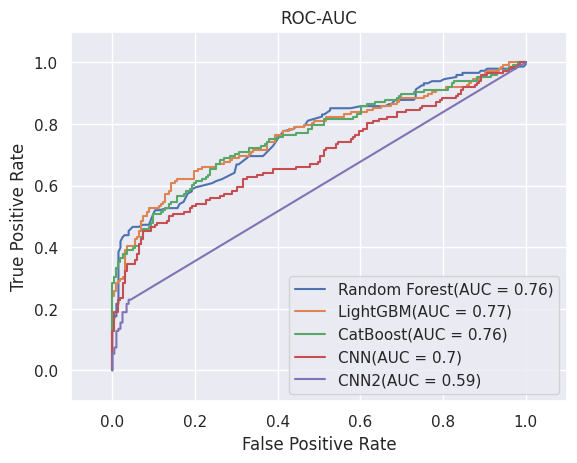

In [117]:
# Plot ROC curves

plt.plot(fpr_test_rf, tpr_test_rf)
plt.plot(fpr_test_XGB, tpr_test_XGB)
plt.plot(fpr_test_CB, tpr_test_CB)
plt.plot(fpr_test_CNN, tpr_test_CNN)
plt.plot(fpr_test_CNN2, tpr_test_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

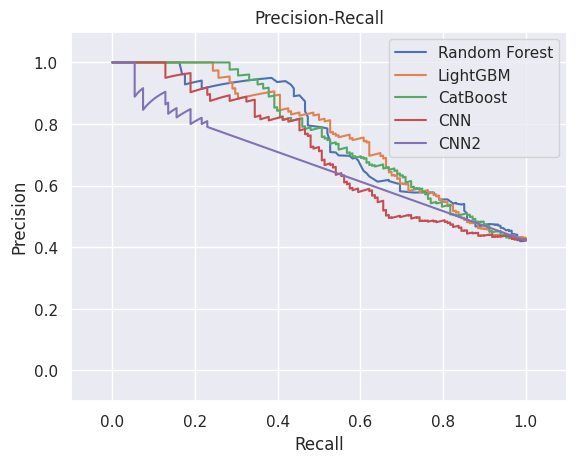

In [118]:
plt.plot(recall_test_rf, precision_test_rf)
plt.plot(recall_test_XGB, precision_test_XGB)
plt.plot(recall_test_CB, precision_test_CB)
plt.plot(recall_test_CNN, precision_test_CNN)
plt.plot(recall_test_CNN2, precision_test_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

# 💠Implementing all models again after treating class imbalance

## 🔸Treating Class Imbalance

In [119]:
training_df = train_df.sample(frac = 0.8)
testing_df = train_df.drop(training_df.index)

print(training_df.shape)
print(testing_df.shape)

(1404, 163)
(351, 163)


In [127]:
# handling class imbalance by declaring majority and minority classes

# train_df_majority = training_df["normal"] #training_df.lable=="normal"]
# train_df_murmur = training_df["murmur"]  #training_df.label=="murmur"]
# train_df_extrastole = training_df["extrastole"]  #training_df.label=="extrastole"]
# train_df_extrahls = training_df["extrahls"]  #training_df.label=="extrahls"]
# train_df_artifact = training_df["artifact"]  #training_df.label=="artifact"]

train_df_majority = training_df[training_df.equals =="normal"]
train_df_murmur = training_df[training_df.equals=="murmur"]
train_df_extrastole = training_df[training_df.equals=="extrastole"]
train_df_extrahls = training_df[training_df.equals=="extrahls"]
train_df_artifact = training_df[training_df.equals=="artifact"]

In [128]:
majority_number = len(train_df_majority)

# upsample the minority classes
df_minority1_upsampled = resample(train_df_murmur,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority2_upsampled = resample(train_df_extrastole,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority3_upsampled = resample(train_df_extrahls,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority4_upsampled = resample(train_df_artifact,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

In [129]:
# combine majority class with the upsampled minority classes

df_upsampled = pd.concat([train_df_majority,
                          df_minority1_upsampled,
                          df_minority2_upsampled,
                          df_minority3_upsampled,
                        df_minority4_upsampled],
                         ignore_index=False)

In [131]:
# df_upsampled.category.value_counts()   // check

In [132]:
training_df.category.value_counts()

normal        838
murmur        314
extrastole    111
artifact       96
extrahls       45
Name: category, dtype: int64

In [138]:
#class distribution after upsampling is done

# df_upsampled.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

# df_upsampled.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})   // check

In [144]:
#### Transforming and Encoding for CNN again using One Hot Encoding

Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

# df_upsampled.shape

x_train_re = df_upsampled.iloc[:, :-1].values
y_train_re = df_upsampled["category"].values

x_test_re = testing_df.iloc[:,:-1].values
y_test_re = testing_df["category"].values

print(x_train_re.shape)
print(y_train_re.shape)
print(x_test_re.shape)
print(y_test_re.shape)

IndexingError: ignored

## 🔸Transforming and Encoding for CNN again using One Hot Encoding

In [145]:
y_train_re_cnn = Encoder_Function.fit_transform(np.array(y_train_re).reshape(-1,1)).toarray()
y_test_re_cnn = Encoder_Function.transform(np.array(y_test_re).reshape(-1,1)).toarray()

NameError: ignored

In [ ]:
x_train_re_cnn = np.expand_dims(x_train_re,axis=2)
x_test_re_cnn = np.expand_dims(x_test_re,axis=2)

In [ ]:
print(x_train_re_cnn.shape)
print(y_train_re_cnn.shape)
print(x_test_re_cnn.shape)
print(y_test_re_cnn.shape)

In [ ]:
cnnreference_df_re = pd.DataFrame()
cnnreference_df_re['Actual'] = df_upsampled["category"].values
cnnreference_df_re['Encoded'] = [''.join(str(y_train_re_cnn[i,:].tolist())) for i in range(y_train_re_cnn.shape[0])]
cnnreference_df_re.drop_duplicates()

In [ ]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_re_cnn.shape[1],1)

In [ ]:
input_shape_dim

## 🔸CNN CONV1D

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=input_shape_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [ ]:
print(Model.summary())

In [ ]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
Conv1D_Model = Model.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

In [ ]:
Model_Results = Model.evaluate(x_test_re_cnn,y_test_re_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

In [ ]:
indexes_predict = tf.argmax(Model.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

In [ ]:
bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

In [ ]:
cm_cnn_re=confusion_matrix(Model.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_cnn_re_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

In [ ]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

In [ ]:
y_pred_proba_test_re_CNN = bin_prob(Model.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN, tpr_test_re_CNN, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN)
roc_auc_test_re_CNN = auc(fpr_test_re_CNN, tpr_test_re_CNN)
precision_test_re_CNN, recall_test_re_CNN, thresholds_test_re_CNN = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN)

In [ ]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔸CNN 1D Experiment

In [ ]:
Conv1D_Model_2 = Model_2.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

In [ ]:
Model_Results_2 = Model_2.evaluate(x_test_re_cnn,y_test_re_cnn)
print("LOSS:  " + "%.4f" % Model_Results_2[0])
print("ACCURACY:  " + "%.4f" % Model_Results_2[1])

In [ ]:
indexes_predict = tf.argmax(Model_2.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

In [ ]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

In [ ]:
cm_cnn2_re=confusion_matrix(Model_2.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_cnn2_re_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

In [ ]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

In [ ]:
y_pred_proba_test_re_CNN2 = bin_prob(Model_2.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN2, tpr_test_re_CNN2, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN2)
roc_auc_test_re_CNN2 = auc(fpr_test_re_CNN2, tpr_test_re_CNN2)
precision_test_re_CNN2, recall_test_re_CNN2, thresholds_test_re_CNN2 = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN2)

In [ ]:
accuracy = Conv1D_Model_2.history['accuracy']
loss = Conv1D_Model_2.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔹Rest of the Models

In [ ]:
print(x_train_re.shape)
print(x_test_re.shape)
print(y_train_re.shape)
print(y_test_re.shape)

In [ ]:
y_train_re = Label_Encode.fit_transform(y_train_re)
y_test_re = Label_Encode.transform(y_test_re)

In [ ]:
reference_df_re = pd.DataFrame()
reference_df_re['Actual'] = df_upsampled["category"].values
reference_df_re['Encoded'] = y_train_re
reference_df_re.drop_duplicates()

## 🔸RandomForest Classifier

In [ ]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV_re = clf_rfGCV_re.fit(x_train_re, y_train_re)
print(clf_rfGCV_re.best_params_)

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_rfGCV_re.predict(x_test_re)))

In [ ]:
print(confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re)))
print(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
cm_rf_re=confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_re, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_rf_bin_re=bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
y_pred_proba_test_re_rf = bin_prob(clf_rfGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_rf, tpr_test_re_rf, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_rf)
roc_auc_test_re_rf = auc(fpr_test_re_rf, tpr_test_re_rf)
precision_test_re_rf, recall_test_re_rf, thresholds_test_re_rf = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_rf)

## 🔸LGBM Classifier

In [ ]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV_re = clf_XGBGCV_re.fit(x_train_re, y_train_re)
print(clf_XGBGCV_re.best_params_)

filterwarnings("ignore")

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

In [ ]:
y_pred_proba_test_re_XGB = bin_prob(clf_XGBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_XGB, tpr_test_re_XGB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_XGB)
roc_auc_test_re_XGB = auc(fpr_test_re_XGB, tpr_test_re_XGB)
precision_test_re_XGB, recall_test_re_XGB, thresholds_test_re_XGB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_XGB)

In [ ]:
print(confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
cm_rf_XGB=confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_XGB, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_XGB_bin_re=bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

In [ ]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

# 🔸CatBoost

In [ ]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV_re.fit(x_train, y_train)
print(clf_CBGCV_re.best_params_)

filterwarnings("ignore")

In [ ]:
y_pred_proba_test_re_CB = bin_prob(clf_CBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_CB, tpr_test_re_CB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_CB)
roc_auc_test_re_CB = auc(fpr_test_re_CB, tpr_test_re_CB)
precision_test_re_CB, recall_test_re_CB, thresholds_test_re_CB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_CB)

In [ ]:
print(confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_CBGCV_re.predict(x_test_re)))

In [ ]:
cm_rf_CB=confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_CB, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_CB_bin_re=bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

In [ ]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

In [ ]:
# Plot ROC curves

plt.plot(fpr_test_re_rf, tpr_test_re_rf)
plt.plot(fpr_test_re_XGB, tpr_test_re_XGB)
plt.plot(fpr_test_re_CB, tpr_test_re_CB)
plt.plot(fpr_test_re_CNN, tpr_test_re_CNN)
plt.plot(fpr_test_re_CNN2, tpr_test_re_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_re_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_re_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_re_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_re_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_re_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

In [ ]:
plt.plot(recall_test_re_rf, precision_test_re_rf)
plt.plot(recall_test_re_XGB, precision_test_re_XGB)
plt.plot(recall_test_re_CB, precision_test_re_CB)
plt.plot(recall_test_re_CNN, precision_test_re_CNN)
plt.plot(recall_test_re_CNN2, precision_test_re_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()